In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f_birth=pd.read_csv('birth_cal.csv',index_col=[0],parse_dates=[0])

In [3]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [4]:
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [5]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<AxesSubplot:xlabel='date'>

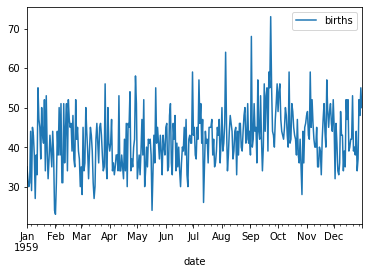

In [6]:
f_birth.plot()

The data seems to be somewhat stationary.

In [7]:
f_birth_mean=f_birth.rolling(window=7).mean() #weekly average or moving mean

<AxesSubplot:xlabel='date'>

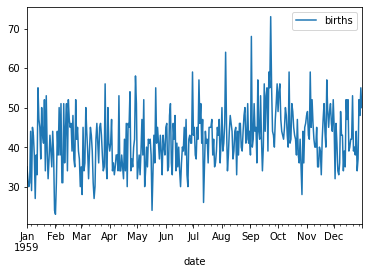

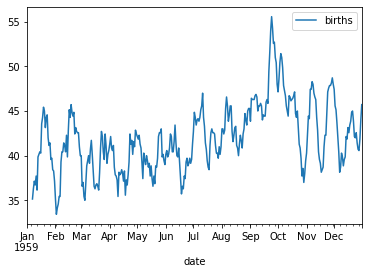

In [8]:
f_birth.plot()
f_birth_mean.plot()

<AxesSubplot:xlabel='date'>

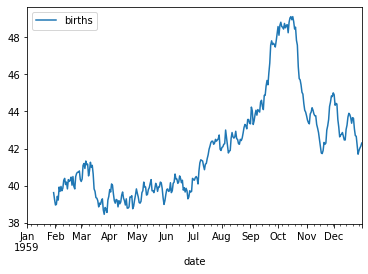

In [9]:
#similarly to visualize moving average for a month's duration

f_birth_mean=f_birth.rolling(window=30).mean()
f_birth_mean.plot()

It can be seen that the data is not quite stationary as it was appearing to be before.

Using a Baseline Model: Taking the previous day data as the forecasted data.

In [10]:
base_df=pd.concat([f_birth.births,f_birth.births.shift(1)],axis=1)

In [11]:
base_df.head()

,births,births
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [12]:
base_df.columns=['Actual_Birth','Forecasted_Birth']

In [13]:
base_df.head()

,Actual_Birth,Forecasted_Birth
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [14]:
from sklearn.metrics import mean_squared_error

birth_test=base_df[1:]
birth_error=mean_squared_error(birth_test['Actual_Birth'],birth_test['Forecasted_Birth']) # Calculating MSE

print('MSE= ',birth_error)
print('RMSE= ',np.sqrt(birth_error))

MSE=  84.22252747252747
RMSE=  9.177283229394606


Forecasting using ARIMA Model<br>
ARIMA: Autoregressive(p) Integrated(d) Moving Average(q)

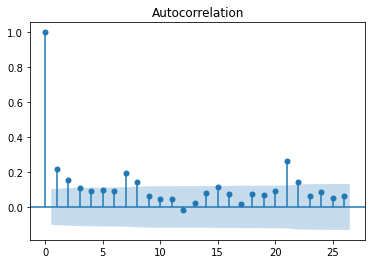

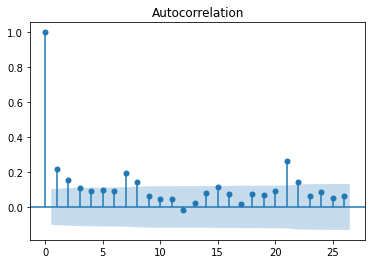

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#plot acf to identify parameter Q
plot_acf(f_birth)

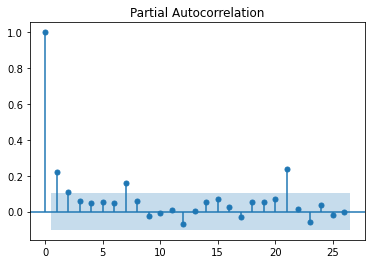

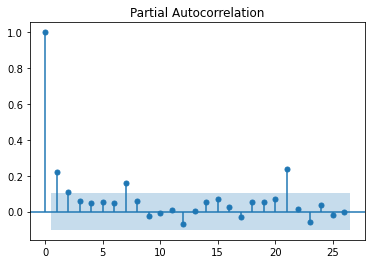

In [17]:
#plot acf to identify parameter P
plot_pacf(f_birth)

## MODEL CREATION- ARIMA

In [18]:
# Q=3,4  P=2,3 d=not stationary(1)

#splitting into test-train

train_df=f_birth[:330]
test_df=f_birth[330:365]
print('train size: ',train_df.size)
print('test size: ',test_df.size)

train size:  330
test size:  35


In [19]:
from statsmodels.tsa.arima_model import ARIMA

model= ARIMA(train_df,order=(2,1,3))
model_fit=model.fit()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [20]:
model_fit.aic

2230.948250936836

In [21]:
#forecasting births based on train data for next 35 days
prediction=model_fit.forecast(steps=35)[0]

In [22]:
prediction

array([45.30369525, 46.31062954, 43.64945222, 44.59219337, 46.4970561 ,
       44.34347173, 44.08983821, 46.34389851, 45.07534281, 43.88105025,
       45.95214177, 45.69576242, 43.97396863, 45.4567354 , 46.10376875,
       44.31133209, 44.99232822, 46.26018578, 44.79344637, 44.66473089,
       46.18572784, 45.30636425, 44.53321808, 45.94670217, 45.74843348,
       44.60563609, 45.63339506, 46.04984626, 44.84523788, 45.33693955,
       46.18219633, 45.18585581, 45.1298271 , 46.15766644, 45.55081274])

In [23]:
test_df.births

date
1959-11-27    51
1959-11-28    46
1959-11-29    44
1959-11-30    52
1959-12-01    45
1959-12-02    32
1959-12-03    46
1959-12-04    41
1959-12-05    34
1959-12-06    33
1959-12-07    36
1959-12-08    49
1959-12-09    43
1959-12-10    43
1959-12-11    34
1959-12-12    39
1959-12-13    35
1959-12-14    52
1959-12-15    47
1959-12-16    52
1959-12-17    39
1959-12-18    40
1959-12-19    42
1959-12-20    42
1959-12-21    53
1959-12-22    39
1959-12-23    40
1959-12-24    38
1959-12-25    44
1959-12-26    34
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, dtype: int64

In [24]:
np.sqrt(mean_squared_error(test_df,prediction))

6.859972872440527

In [25]:
#for p=3 q=4
model= ARIMA(train_df,order=(3,1,4))
model_fit=model.fit()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [26]:
model_fit.aic

2225.035095350161

These parameters are giving a little less aic value than before, inclining towards accuracy.

In [27]:
prediction=model_fit.forecast(steps=35)[0]

In [28]:
print('MSE: ',mean_squared_error(test_df,prediction))
print('RMSE: ',np.sqrt(mean_squared_error(test_df,prediction)))

MSE:  43.80110179078232
RMSE:  6.6182400825885965


## Conclusion1 <br>
Looking at the RMSE values for both the models<br>
Baseline Model: 9.177283229394606<br>
ARIMA Model: 6.6182400825885965<br>'
We can conclude that the ARIMA Model proved to predict more accurate values.

# Data Transformation

**Normalization**<br>
normalization= (x-min) / (max-min)

In [29]:
norm_birth=(f_birth['births']-f_birth['births'].min())/(f_birth['births'].max()-f_birth['births'].min())

In [30]:
norm_birth.head()

date
1959-01-01    0.24
1959-01-02    0.18
1959-01-03    0.14
1959-01-04    0.16
1959-01-05    0.42
Name: births, dtype: float64

In [31]:
#Test-Train Split
train_df=norm_birth[:330]
test_df=norm_birth[330:365]

In [32]:
#Apply ARIMA Model

from statsmodels.tsa.arima_model import ARIMA

model= ARIMA(train_df,order=(3,1,4))
model_fit=model.fit()
model_fit.aic

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


-349.076009230611

In [33]:
norm_pred=model_fit.forecast(steps=35)[0]
norm_pred

array([0.41802455, 0.42166703, 0.42822176, 0.44790949, 0.4516982 ,
       0.45101222, 0.43324125, 0.42515643, 0.42054078, 0.43526556,
       0.44668645, 0.45781172, 0.44959935, 0.43920615, 0.42455804,
       0.4268808 , 0.4350787 , 0.45243305, 0.45718582, 0.45470933,
       0.43888663, 0.430044  , 0.42733837, 0.4405597 , 0.45268641,
       0.46186322, 0.45470578, 0.4435261 , 0.43074983, 0.4324112 ,
       0.44156525, 0.45724804, 0.46237349, 0.45873961, 0.44428207])

In [34]:
#Calculate RMSE
np.sqrt(mean_squared_error(test_df,norm_pred))

0.13238017978039465

In [35]:
norm_pred_rev=norm_pred*(f_birth['births'].max()-f_birth['births'].min())+f_birth['births'].min()
norm_pred_rev

array([43.9012276 , 44.08335162, 44.41108783, 45.39547459, 45.58491008,
       45.55061083, 44.66206265, 44.25782165, 44.02703886, 44.76327785,
       45.33432268, 45.89058577, 45.47996738, 44.96030748, 44.22790186,
       44.34403997, 44.75393508, 45.62165235, 45.85929078, 45.73546637,
       44.94433146, 44.50219986, 44.36691864, 45.02798522, 45.63432036,
       46.09316106, 45.73528899, 45.17630493, 44.5374914 , 44.62056014,
       45.07826255, 45.86240194, 46.11867453, 45.93698042, 45.21410344])

In [36]:
test_df_rev=test_df*(f_birth['births'].max()-f_birth['births'].min())+f_birth['births'].min()
train_df_rev=train_df*(f_birth['births'].max()-f_birth['births'].min())+f_birth['births'].min()
test_df_rev.head()

date
1959-11-27    51.0
1959-11-28    46.0
1959-11-29    44.0
1959-11-30    52.0
1959-12-01    45.0
Name: births, dtype: float64

In [37]:
#ARIMA AIC for transformed data

model= ARIMA(train_df_rev,order=(3,1,4))
model_fit=model.fit()
model_fit.aic

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2225.035095350161

In [38]:
#RMSE
np.sqrt(mean_squared_error(test_df_rev,norm_pred_rev))

6.619008989019732

Even after data normalization, the AIC and the RMSE values seem to be unchanged.<br>

<br>**Standardisation**<br>
x-mean/std

In [39]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
std_scaler=std_scaler.fit(f_birth)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [40]:
std_birth=std_scaler.transform(f_birth)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [41]:
std_birth[0:6]

array([[-0.95130099],
       [-1.36012148],
       [-1.63266846],
       [-1.49639497],
       [ 0.27516045],
       [-1.76894196]])

In [42]:
#Test-Train Split
train_df=std_birth[:330]
test_df=std_birth[330:365]

In [43]:
#ARIMA AIC for standardised data

model= ARIMA(train_df,order=(3,1,4))
model_fit=model.fit()
model_fit.aic

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


913.5808746479815

In [44]:
std_pred=model_fit.forecast(steps=35)[0]
std_pred

array([0.26174802, 0.28617187, 0.33066688, 0.46501957, 0.49124091,
       0.48688117, 0.36576298, 0.31033582, 0.27848219, 0.37866472,
       0.45669122, 0.53291421, 0.4772575 , 0.40640598, 0.306243  ,
       0.32167447, 0.37738746, 0.49585981, 0.52865945, 0.51208507,
       0.4042217 , 0.34361367, 0.32477983, 0.41473568, 0.49759372,
       0.56054487, 0.51206495, 0.43583098, 0.34840941, 0.35933706,
       0.42158577, 0.52868707, 0.56403253, 0.53955742, 0.44097542])

In [45]:
std_pred_rev=std_scaler.inverse_transform(std_pred)

In [46]:
std_pred_rev

array([43.90157706, 44.0808038 , 44.40731637, 45.39322116, 45.58563819,
       45.55364562, 44.66485806, 44.25812333, 44.02437553, 44.75953335,
       45.33210624, 45.89144453, 45.48302534, 44.96310387, 44.22808944,
       44.34132843, 44.75016058, 45.61953254, 45.86022235, 45.7385965 ,
       44.94707519, 44.5023223 , 44.36411611, 45.02422874, 45.63225627,
       46.09420344, 45.73844886, 45.1790299 , 44.53751432, 44.61770345,
       45.07449598, 45.86042503, 46.11979654, 45.94019365, 45.21678077])

In [47]:
test_df_rev=std_scaler.inverse_transform(test_df)

In [48]:
test_df_rev

array([[51.],
       [46.],
       [44.],
       [52.],
       [45.],
       [32.],
       [46.],
       [41.],
       [34.],
       [33.],
       [36.],
       [49.],
       [43.],
       [43.],
       [34.],
       [39.],
       [35.],
       [52.],
       [47.],
       [52.],
       [39.],
       [40.],
       [42.],
       [42.],
       [53.],
       [39.],
       [40.],
       [38.],
       [44.],
       [34.],
       [37.],
       [52.],
       [48.],
       [55.],
       [50.]])

In [49]:
np.sqrt(mean_squared_error(test_df_rev,std_pred_rev))

6.618506146136231

## Conclusion2 <br>
Even after normalizing and standardising the dataset, the prediction seems to remain almost similar. For the given dataset, transformation methods didn't yield much useful result.